# Sobre o IVS

## Informações Gerais

O IVS foi obtido a partir [deste site](http://ivs.ipea.gov.br/index.php/pt/sobre) e dele foram retiradas 100% das explicações a seguir.

O IVS é o resultado da média aritmética dos subíndices: IVS Infraestrutura Urbana, IVS Capital Humano e IVS Renda e Trabalho, cada um deles entra no cálculo do IVS final com o mesmo peso.

Para o cálculo dos subíndices, foram utilizados dezesseis indicadores calculados a partir das variáveis dos censos demográficos do IBGE, para os anos de 2000 e 2010 – tabulados para o ADH no Brasil com seus respectivos pesos.


## IVS Infraestrutura Humana

A dimensão que contempla a vulnerabilidade da Infraestrutura Urbana procura refletir as condições de acesso a serviços de saneamento básico e de mobilidade urbana, por serem dois aspectos relacionados ao lugar de domicílio das pessoas que impactam significativamente sua qualidade de vida.

## IVS Renda e Trabalho

A vulnerabilidade de Renda e Trabalho agrupa não só indicadores relativos à insuficiência de renda das famílias, no momento da coleta dos dados (percentual de famílias com renda domiciliar per capita de até R$ 255,00 mensais, em agosto de 2010) como incorpora outros fatores que, associados ao fluxo de renda insuficiente, configuram um estado de insegurança de renda das famílias: a desocupação de adultos, a ocupação informal de adultos pouco escolarizados, a dependência da família com relação à renda de pessoas idosas, assim como a presença de trabalho infantil.

## IVS Capital Humano

A dimensão Capital Humano envolve dois tipos de ativos que, de acordo com Schultz (1962), determinam as perspectivas de futuro dos indivíduos: suas condições de saúde e seu acesso à educação.

Neste sentido, foram selecionadas para essa dimensão variáveis que refletem não só a presença atual destes ativos nos domicílios, mas também as possibilidades de sua ampliação pelas gerações mais jovens.

In [61]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
homicides = pd.read_pickle("../outputs/homicides_per_capita.pkl")
ivs = pd.read_excel("../assets/ivs_todos_municipios.xlsx").rename(columns={"Município": "Código"})
capitals = pd.read_csv("../assets/capitais_brasil.csv")

In [111]:
ivs

,UF,Nome da UF,Código,Nome do Município,Município com 6 dígitos,Ano,IVS,IVS Infraestrutura Urbana,IVS Capital Humano,IVS Renda e Trabalho,...,% de empregados sem carteira - 18 anos ou mais,% de trabalhadores do setor público - 18 anos ou mais,% de trabalhadores por conta própria - 18 anos ou mais,% de empregadores - 18 anos ou mais,Grau de formalização dos ocupados - 18 anos ou mais,% dos ocupados com fundamental completo - 18 anos ou mais,% dos ocupados com médio completo - 18 anos ou mais,% dos ocupados com superior completo - 18 anos ou mais,Rendimento médio dos ocupados - 18 anos ou mais,% dos ocupados sem rendimento - 18 anos ou mais
0,11,Rondônia,1100015,Alta Floresta D'Oeste,110001,2000,0.582,0.584,0.629,0.532,...,20.48,2.46,47.37,1.83,22.83,22.51,11.60,1.38,0.00,12.51
1,11,Rondônia,1100072,Corumbiara,110007,2010,0.336,0.201,0.427,0.381,...,21.19,4.27,34.94,0.20,43.30,38.40,20.08,6.19,680.68,13.05
2,11,Rondônia,1100072,Corumbiara,110007,2000,0.604,0.614,0.707,0.491,...,16.33,2.64,37.49,1.30,22.07,15.64,7.70,0.86,0.00,27.27
3,11,Rondônia,1100064,Colorado do Oeste,110006,2010,0.280,0.114,0.394,0.333,...,22.56,9.60,25.97,1.54,48.57,50.62,34.39,10.24,931.16,10.75
4,11,Rondônia,1100064,Colorado do Oeste,110006,2000,0.496,0.475,0.535,0.477,...,22.65,7.36,35.99,2.25,37.25,34.50,21.01,3.51,0.00,9.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,52,Goiás,5220454,Senador Canedo,522045,2010,0.367,0.444,0.374,0.283,...,22.36,6.98,16.58,0.76,62.08,58.94,37.17,5.04,921.15,1.69
11126,52,Goiás,5221197,Terezópolis de Goiás,522119,2000,0.464,0.301,0.558,0.533,...,42.75,5.86,25.54,0.43,30.72,31.30,14.62,1.28,0.00,4.41
11127,52,Goiás,5221197,Terezópolis de Goiás,522119,2010,0.338,0.286,0.353,0.375,...,35.95,6.56,22.21,2.14,40.86,52.34,33.92,4.56,872.48,2.25
11128,53,Distrito Federal,5300108,Brasília,530010,2010,0.294,0.412,0.265,0.204,...,14.77,13.90,16.20,1.88,71.62,76.39,61.00,24.55,2581.69,1.58


In [3]:
df = capitals.set_index("Código").join(ivs.set_index("Código")[[
    'Ano', 'IVS', 'IVS Infraestrutura Urbana', 
    'IVS Capital Humano', 'IVS Renda e Trabalho', 'IDHM'
]])

In [4]:
homicides_pivot = pd.pivot_table(homicides
                                 .reset_index()
                                 .melt(id_vars=["Código"], 
                                       var_name="Ano", 
                                       value_name="Homicidios"), 
                                 index=["Código", "Ano"])

In [5]:
df_pivot = pd.pivot_table(df.reset_index(), index=list(capitals.columns) + ["Ano"])

In [102]:
df = df_pivot.join(homicides_pivot[["Homicidios"]]).reset_index()
df["Ano"] = df["Ano"].apply(str)

In [107]:
df.head(2)

,Código,Ano,Capitais,Estados,Siglas dos Estados,Regiões,IDHM,IVS,IVS Capital Humano,IVS Infraestrutura Urbana,IVS Renda e Trabalho,Homicidios
0,1100205,2000,Porto Velho,Rondônia,RO,Norte,0.613,0.457,0.531,0.422,0.419,0.000807
1,1100205,2010,Porto Velho,Rondônia,RO,Norte,0.736,0.322,0.364,0.372,0.230,0.000604


In [11]:
homicides.loc[1100205][[2000, 2010]]

2000    0.000807
2010    0.000604
Name: 1100205, dtype: float64

In [56]:
px.scatter(df.sort_values(by="Regiões"), 
           x="Siglas dos Estados", 
           y="IVS Capital Humano", 
           color="IDHM", 
           symbol="Ano")

In [57]:
px.scatter(df.sort_values(by="Regiões"), 
           x="Siglas dos Estados", 
           y="Homicidios", 
           color="IDHM", 
           symbol="Ano")

In [25]:
px.scatter(df, x="IVS", y="Homicidios", color="Regiões", text="Siglas dos Estados", facet_row="Ano")

In [103]:
px.bar(df.sort_values(by=["Regiões", "Ano"]), 
       x="Siglas dos Estados", y="Homicidios", color='Ano', barmode="group")

In [84]:
px.box(df, x="Regiões", y="IVS", color="Ano")

In [82]:
px.scatter(df, 
           x="IVS Renda e Trabalho", 
           y="IVS Capital Humano", 
           color="Regiões", 
           text="Siglas dos Estados", 
           facet_row="Ano")

In [73]:
df.columns

Index(['Código', 'Ano', 'Capitais', 'Estados', 'Siglas dos Estados', 'Regiões',
       'IDHM', 'IVS', 'IVS Capital Humano', 'IVS Infraestrutura Urbana',
       'IVS Renda e Trabalho', 'Homicidios'],
      dtype='object')

## Gráfico Causal

Abaixo desenhei um possível gráfico causal dessas variáveis e índices. A premissa básica é que o IVS e o IDHM impactam diretamente na taxa de homicídios. Ambos, são reflexos de políticas públicas. O IVS, entretanto, é separado em três índices: de Capital Humano, de Renda e Trabalho e de Infraestrutura Urbana. 

- H: Homicidios (outcome)
- BF: Adoção do Bolsa Família (binary treatment)
- IDHM
- IVS_RT: IVS Renda e Trabalho
- IVS_CH: IVS Capital Humano
- IVS_IF: IVS Infraestrutura Urbana (controle)
- CP: Contingente Policial (controle)

In [104]:
import networkx as nx
graph = nx.MultiDiGraph()
graph.add_edges_from([
    ("BF", "IVS_CH"),
    ("BF", "IVS_RT"),
    ("BF", "IDHM"),
    ("IDHM", "H"),
    ("IVS_CH", "H"),
    ("IVS_RT", "H"),
    ("IVS_IU", "H"),
    ("CP", "H")
])

[0, 0, 0, 0, 0, 0, 0, 0]

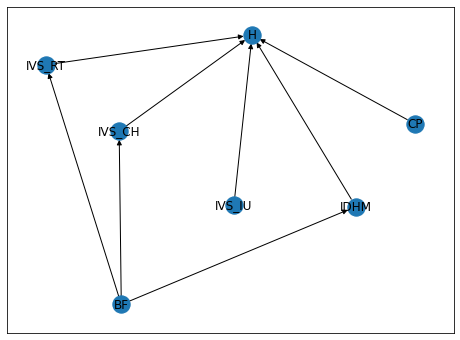

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(graph, ax=ax)

In [ ]:
ideb, região, publica/privada, nível + baseline de lib tosca